# How to retrieve dynamically masked pixels during sigma-clipping

In [1]:
%matplotlib inline
import time
from matplotlib.pyplot import subplots
import fabio
import pyFAI
from pyFAI.gui import jupyter
from pyFAI.test.utilstest import UtilsTest
start_time = time.perf_counter()

In [2]:
img = fabio.open(UtilsTest.getimage("Fairchild.edf")).data
ai = pyFAI.load(UtilsTest.getimage("Fairchild.poni"))
ai

Detector Fairchild%s	 PixelSize= 15µm, 15µm
SampleDetDist= 8.820654e-02 m	PONI= 3.022863e-02, 4.494578e-02 m	rot1=-0.506767  rot2=0.016707  rot3=-0.000011 rad
DirectBeamDist= 100.900 mm	Center: x=6260.743, y=2127.620 pix	Tilt= 29.050° tiltPlanRotation= 1.972°

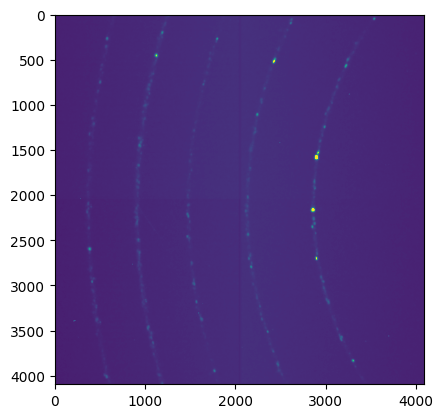

In [3]:
fig,ax = subplots()
_=ax.imshow(img, vmin=500, vmax=1000)

In [4]:
method = ("no", "csr", "cython")
unit = "2th_deg"
thres = 3
i1d = ai.integrate1d(img, 1000, method=method, unit=unit)
sc = ai.sigma_clip_ng(img, 1000, method=method, unit=unit, error_model="azimuthal", thres=thres)

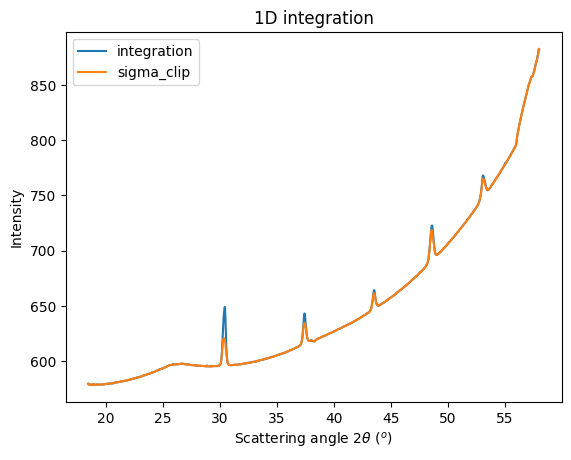

In [5]:
fig, ax = subplots()
jupyter.plot1d(i1d, label="integration", ax=ax)
ax.plot(sc.radial, sc.intensity, label="sigma_clip")
ax.legend()

In [6]:
mean = ai.calcfrom1d(sc.radial,sc.intensity, dim1_unit=sc.unit, shape=img.shape)
std = ai.calcfrom1d(sc.radial,sc.std, dim1_unit=sc.unit, shape=img.shape)
dev = abs(img-mean)/std

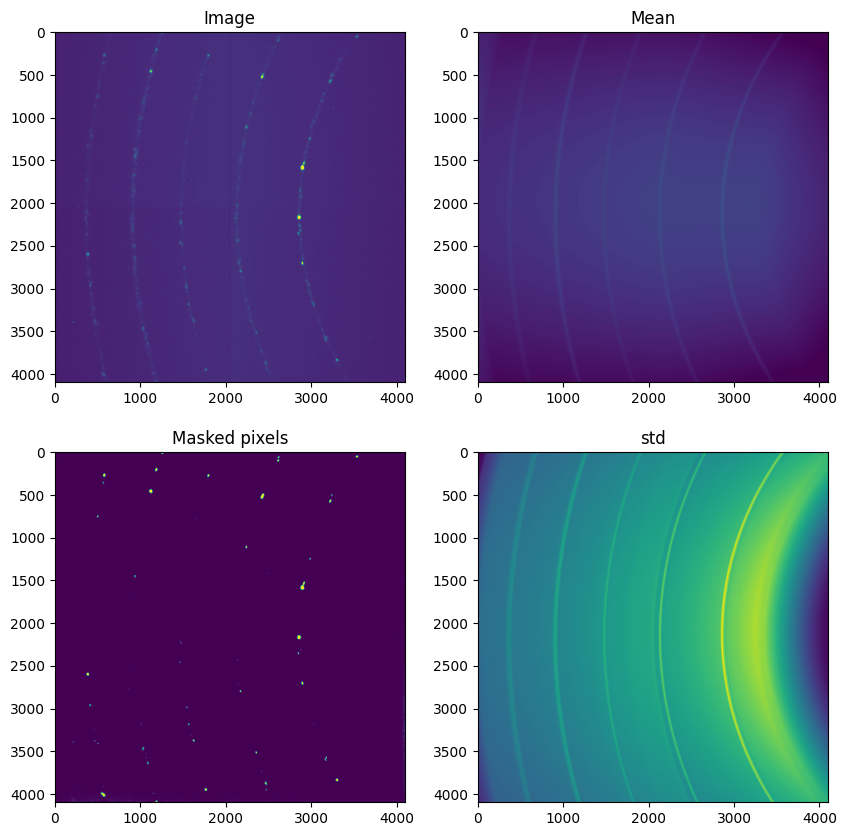

In [7]:
fig,ax = subplots(2,2, figsize=(10,10))
ax[0,0].imshow(img, vmin=500, vmax=1000)
ax[0,1].imshow(mean, vmin=500, vmax=1000)
ax[1,1].imshow(std,)
ax[1,0].imshow(dev>thres)
ax[0,0].set_title("Image")
ax[0,1].set_title("Mean")
ax[1,1].set_title("std")
ax[1,0].set_title("Masked pixels")
pass

In [8]:
print(f"Runtime t={time.perf_counter()-start_time:.3f}s")

Runtime t=11.423s
